In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:/data_science/repo/professional_certificate/travel_insurance.csv')

In [3]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.shape

(1987, 9)

In [5]:
df.dtypes


Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [6]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [7]:
df.TravelInsurance.unique()

array([0, 1], dtype=int64)

In [8]:
df[['GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance']]=df[['GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance']].astype('category')

df.dtypes

Age                       int64
Employment Type          object
GraduateOrNot          category
AnnualIncome              int64
FamilyMembers             int64
ChronicDiseases        category
FrequentFlyer          category
EverTravelledAbroad    category
TravelInsurance        category
dtype: object

In [9]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [10]:

df.groupby(['EverTravelledAbroad','TravelInsurance'])['TravelInsurance'].count()


EverTravelledAbroad  TravelInsurance
No                   0                  1195
                     1                   412
Yes                  0                    82
                     1                   298
Name: TravelInsurance, dtype: int64

In [11]:
df.groupby(['FrequentFlyer','TravelInsurance'])['TravelInsurance'].count()

FrequentFlyer  TravelInsurance
No             0                  1099
               1                   471
Yes            0                   178
               1                   239
Name: TravelInsurance, dtype: int64

In [12]:
df.groupby(['EverTravelledAbroad','FrequentFlyer','TravelInsurance'])['TravelInsurance'].count()

EverTravelledAbroad  FrequentFlyer  TravelInsurance
No                   No             0                  1037
                                    1                   321
                     Yes            0                   158
                                    1                    91
Yes                  No             0                    62
                                    1                   150
                     Yes            0                    20
                                    1                   148
Name: TravelInsurance, dtype: int64

In [13]:
df.groupby(['EverTravelledAbroad','FrequentFlyer','TravelInsurance'])['TravelInsurance'].count()

EverTravelledAbroad  FrequentFlyer  TravelInsurance
No                   No             0                  1037
                                    1                   321
                     Yes            0                   158
                                    1                    91
Yes                  No             0                    62
                                    1                   150
                     Yes            0                    20
                                    1                   148
Name: TravelInsurance, dtype: int64

Text(0.5, 22.960000000000015, 'Ever Travelled Abroad')

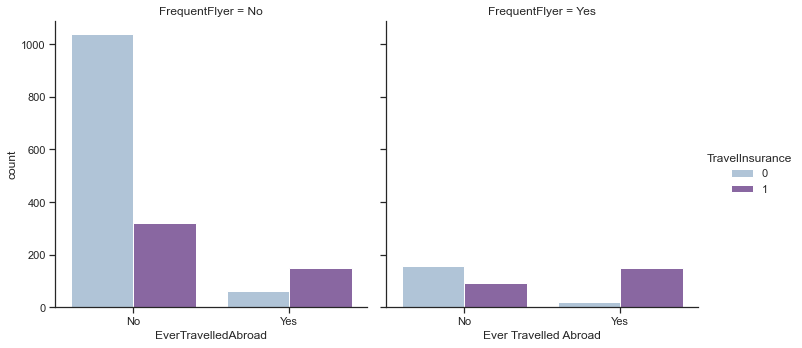

In [14]:
sns.set_theme(style='ticks')
sns.set_context('notebook')
sns.catplot(data=df, x='EverTravelledAbroad',hue='TravelInsurance',col='FrequentFlyer',palette='BuPu',kind='count')
plt.xlabel('Ever Travelled Abroad')

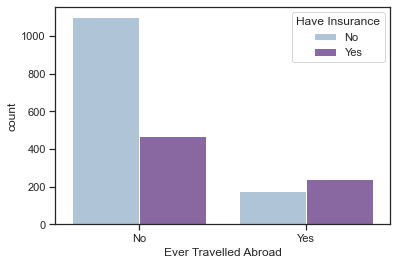

In [15]:
sns.countplot(data=df, x='FrequentFlyer',hue='TravelInsurance', palette='BuPu')
plt.xlabel('Ever Travelled Abroad')
plt.legend(['No','Yes'],title='Have Insurance')

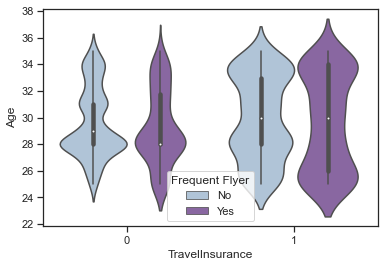

In [16]:
sns.violinplot(data=df,x='TravelInsurance',y='Age',hue='FrequentFlyer', palette='BuPu')
plt.legend(title='Frequent Flyer')

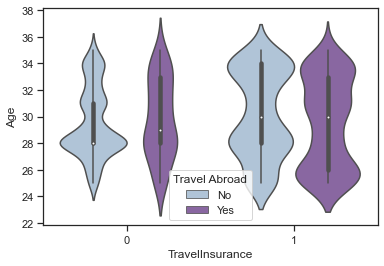

In [17]:
sns.violinplot(data=df,x='TravelInsurance',y='Age',hue='EverTravelledAbroad', palette='BuPu')
plt.legend(loc='lower center',title='Travel Abroad')

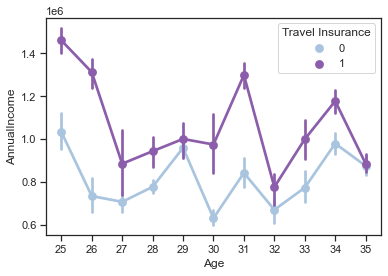

In [18]:
sns.pointplot(data=df,x='Age',y='AnnualIncome',hue='TravelInsurance',palette='BuPu')
plt.legend(title='Travel Insurance')
plt.show()

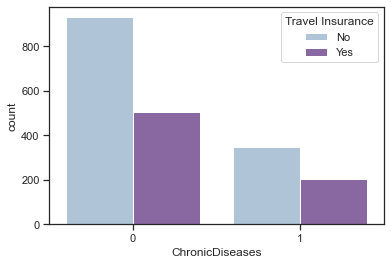

In [19]:
sns.countplot(data=df, x='ChronicDiseases',hue='TravelInsurance',palette='BuPu')
plt.legend(labels=['No','Yes'],title='Travel Insurance')

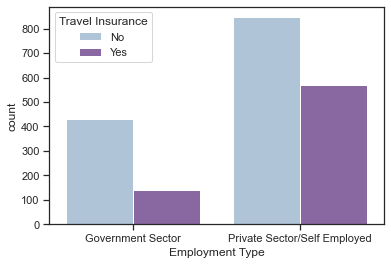

In [20]:
sns.countplot(data=df, x='Employment Type',hue='TravelInsurance',palette='BuPu')
plt.legend(labels=['No','Yes'],title='Travel Insurance')

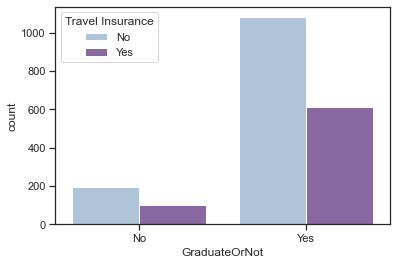

In [21]:
sns.countplot(data=df, x='GraduateOrNot',hue='TravelInsurance',palette='BuPu')
plt.legend(labels=['No','Yes'],title='Travel Insurance')

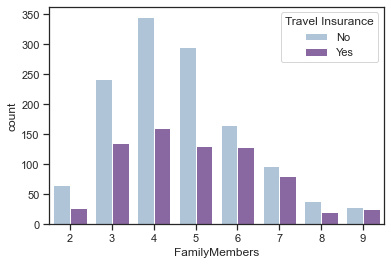

In [22]:
sns.countplot(data=df, x='FamilyMembers',hue='TravelInsurance',palette='BuPu')
plt.legend(labels=['No','Yes'],title='Travel Insurance')

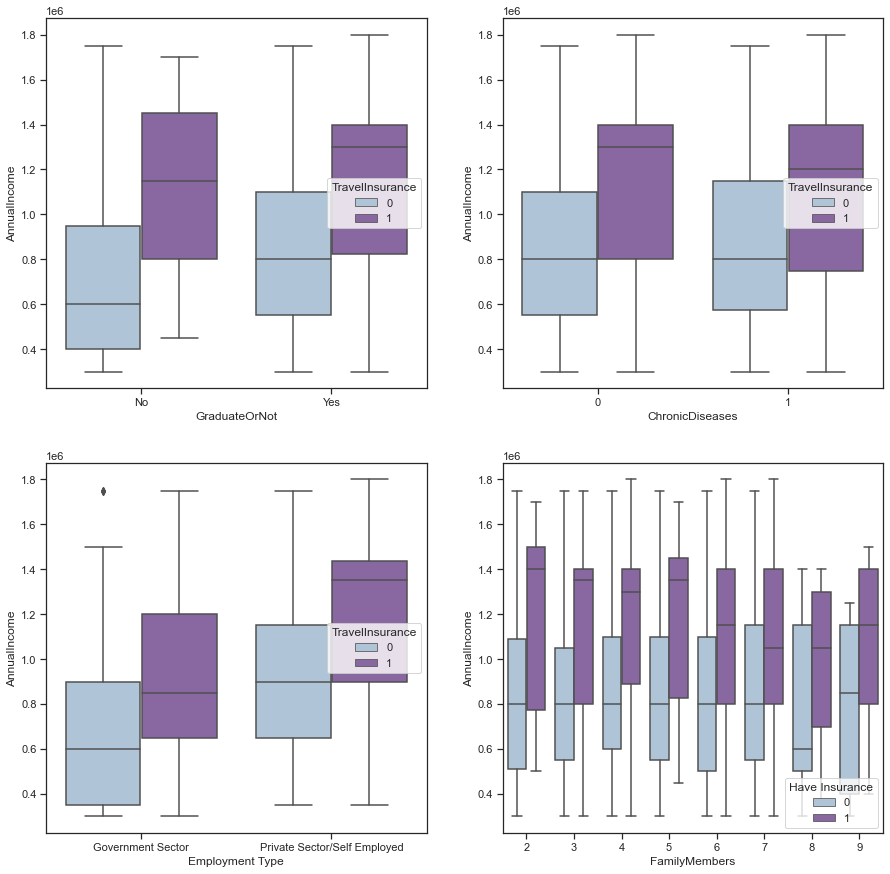

In [23]:
fig,axes = plt.subplots(2,2, figsize=(15,15))
sns.boxplot(data=df,x='GraduateOrNot',y='AnnualIncome', hue='TravelInsurance', palette='BuPu', ax=axes[0,0])
sns.boxplot(data=df,x='ChronicDiseases',y='AnnualIncome', hue='TravelInsurance', palette='BuPu', ax=axes[0,1])
sns.boxplot(data=df,x='Employment Type',y='AnnualIncome', hue='TravelInsurance', palette='BuPu', ax=axes[1,0])
sns.boxplot(data=df,x='FamilyMembers',y='AnnualIncome', hue='TravelInsurance', palette='BuPu', ax=axes[1,1])
plt.legend(loc='lower right', title='Have Insurance')

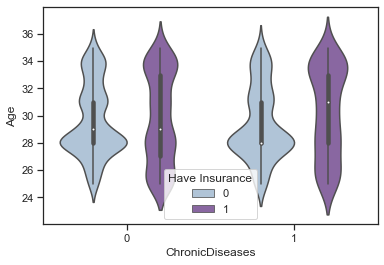

In [24]:
sns.violinplot(data=df, x='ChronicDiseases',y='Age', hue='TravelInsurance',palette='BuPu')
plt.legend(loc='lower center', title='Have Insurance')

In [25]:
df['income level']=np.where(df['AnnualIncome']>=800000,'High','Low')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,income level
0,31,Government Sector,Yes,400000,6,1,No,No,0,Low
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,High
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Low
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Low
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Low


In [26]:
df.groupby(['income level','TravelInsurance'])['TravelInsurance'].count()

income level  TravelInsurance
High          0                  698
              1                  554
Low           0                  579
              1                  156
Name: TravelInsurance, dtype: int64

In [27]:
print(473/1987)

0.2380473074987418


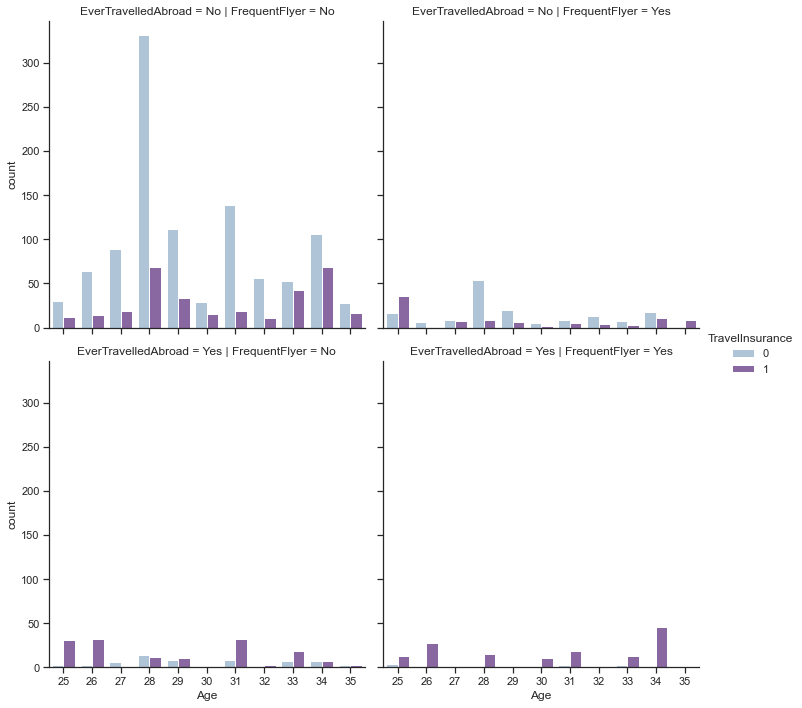

In [28]:
sns.catplot(data=df,x='Age',hue='TravelInsurance',col='FrequentFlyer',row='EverTravelledAbroad',kind='count', palette='BuPu')

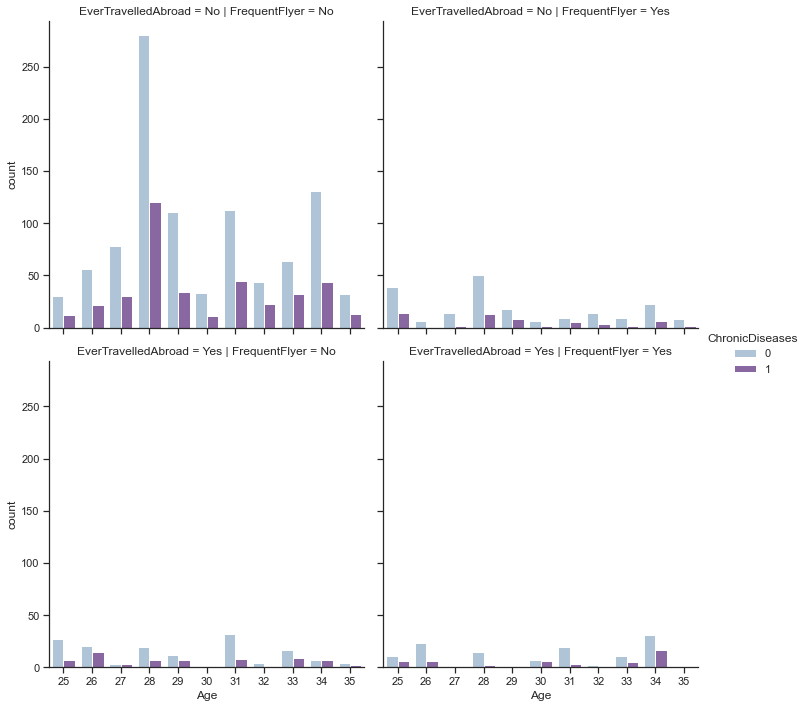

In [29]:
sns.catplot(data=df,x='Age',hue='ChronicDiseases',col='FrequentFlyer',row='EverTravelledAbroad',kind='count', palette='BuPu')

In [30]:
df_notr_noab=df[(df.EverTravelledAbroad=='No')&(df.FrequentFlyer=='No')]
df_notr_noab.shape

(1358, 10)

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_notr_noab.groupby(['FamilyMembers','TravelInsurance','income level'])['TravelInsurance'].count())

FamilyMembers  TravelInsurance  income level
2              0                High             24
                                Low              27
               1                High              5
                                Low               6
3              0                High             93
                                Low             107
               1                High             23
                                Low              30
4              0                High            158
                                Low             126
               1                High             44
                                Low              27
5              0                High            125
                                Low             106
               1                High             26
                                Low              20
6              0                High             60
                                Low              71
               1   

In [32]:
print(554/(698+156))

0.6487119437939111


In [33]:
df_notr_noab.groupby(['GraduateOrNot','TravelInsurance'])['AnnualIncome'].mean()

GraduateOrNot  TravelInsurance
No             0                  655379.746835
               1                  801086.956522
Yes            0                  815301.478953
               1                  866545.454545
Name: AnnualIncome, dtype: float64

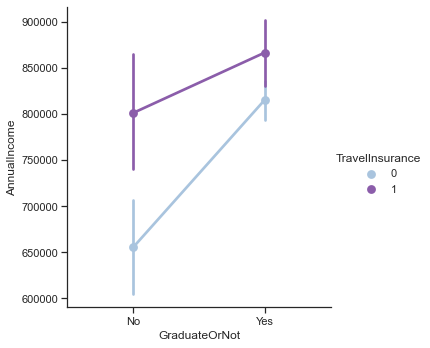

In [34]:
sns.catplot(data=df_notr_noab,x='GraduateOrNot', y='AnnualIncome',hue='TravelInsurance', kind='point', palette='BuPu')
